In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
!pip install keras tensorflow scikit-learn


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=100, verbose=2, validation_data=(X_test, y_test))

Epoch 1/30
600/600 - 78s - loss: 0.1950 - accuracy: 0.9425 - val_loss: 0.0720 - val_accuracy: 0.9776 - 78s/epoch - 130ms/step
Epoch 2/30
600/600 - 55s - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0433 - val_accuracy: 0.9857 - 55s/epoch - 91ms/step
Epoch 3/30
600/600 - 52s - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.0388 - val_accuracy: 0.9874 - 52s/epoch - 87ms/step
Epoch 4/30
600/600 - 52s - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0345 - val_accuracy: 0.9887 - 52s/epoch - 87ms/step
Epoch 5/30
600/600 - 54s - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0354 - val_accuracy: 0.9894 - 54s/epoch - 91ms/step
Epoch 6/30
600/600 - 52s - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0377 - val_accuracy: 0.9879 - 52s/epoch - 87ms/step
Epoch 7/30
600/600 - 49s - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0298 - val_accuracy: 0.9912 - 49s/epoch - 82ms/step
Epoch 8/30
600/600 - 50s - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0317 - val_accuracy: 0.9910 - 50s/epoch - 84ms/step

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Acurácia: {scores[1] * 100:.2f}%')

Acurácia: 99.06%


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 1s 4ms/step


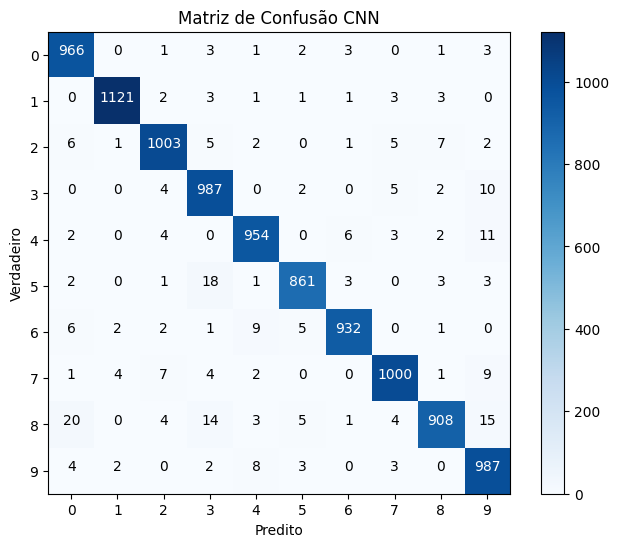

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão CNN')
plt.colorbar()
thresh = confusion_mtx.max() / 2.
for i in range(10):
    for j in range(10):
        color = 'white' if confusion_mtx[i, j] > thresh else 'black'
        plt.text(j, i, f'{confusion_mtx[i, j]}', horizontalalignment="center", color=color)
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

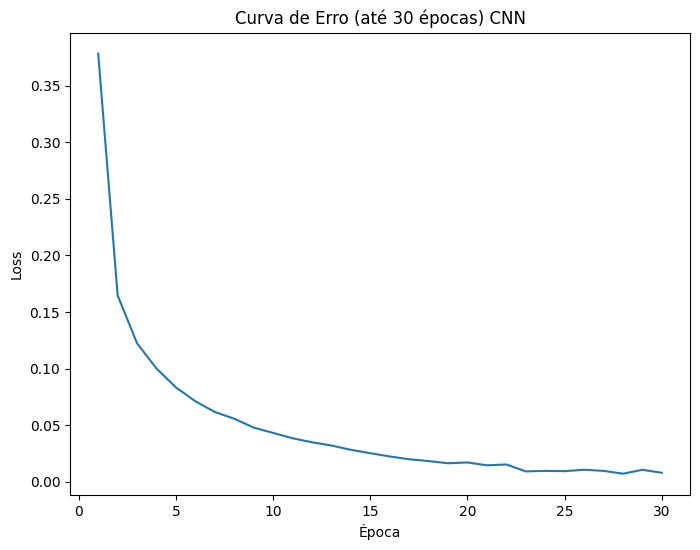

In [ ]:
loss = history.history['loss']
plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), loss[:30])
plt.title('Curva de Erro (até 30 épocas) CNN')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
600/600 - 11s - loss: 0.3764 - accuracy: 0.8924 - val_loss: 0.1898 - val_accuracy: 0.9453 - 11s/epoch - 18ms/step
Epoch 2/30
600/600 - 5s - loss: 0.1604 - accuracy: 0.9541 - val_loss: 0.1362 - val_accuracy: 0.9587 - 5s/epoch - 9ms/step
Epoch 3/30
600/600 - 7s - loss: 0

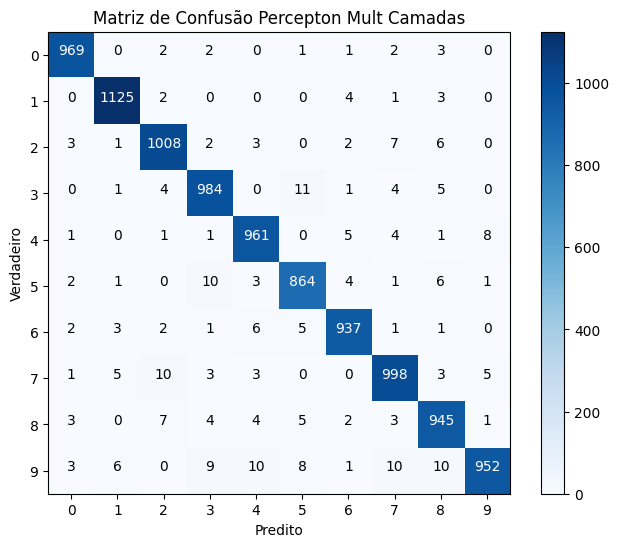

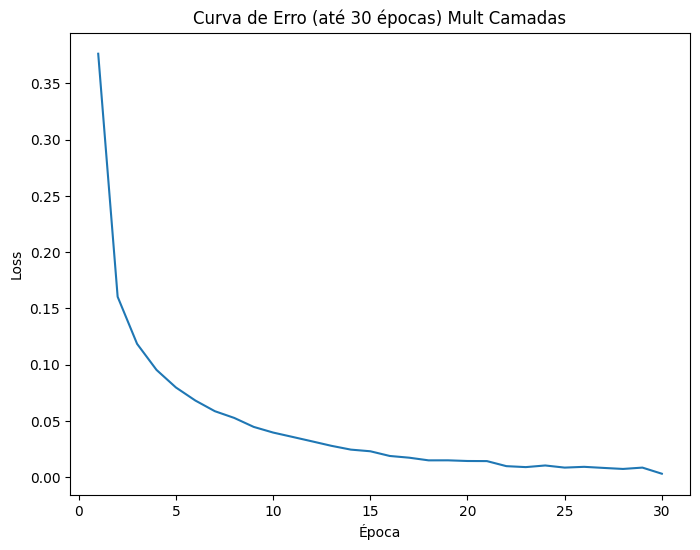

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32')

X_train /= 255
X_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, input_dim=28 * 28, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=30, batch_size=100, verbose=2, validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Acurácia: {scores[1] * 100:.2f}%')


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão Percepton Mult Camadas')
plt.colorbar()
thresh = confusion_mtx.max() / 2.
for i in range(10):
    for j in range(10):
        color = 'white' if confusion_mtx[i, j] > thresh else 'black'
        plt.text(j, i, f'{confusion_mtx[i, j]}', horizontalalignment="center", color=color)
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


# Plotar a curva de erro
loss = history.history['loss']
plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), loss[:30])
plt.title('Curva de Erro (até 30 épocas) Mult Camadas')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

